In [ ]:
# Priyal
# Dataset -CM1
# Model -Undersampling
# Train for balancing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**

In [2]:
import pandas as pd

# Load cm1 dataset
cm1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/cm1.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(cm1_data.head())


First few rows of the dataset:
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2  

In [3]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(cm1_data.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  

In [4]:
# Summary statistics of numerical attributes
print("\nSummary statistics of numerical attributes:")
print(cm1_data.describe())



Summary statistics of numerical attributes:
              loc        v(g)       ev(g)       iv(g)            n  \
count  498.000000  498.000000  498.000000  498.000000   498.000000   
mean    29.644779    5.382329    2.490763    3.528916   143.956426   
std     42.753572    8.347359    3.658847    5.464398   221.049888   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      8.000000    1.000000    1.000000    1.000000    25.000000   
50%     17.000000    3.000000    1.000000    2.000000    67.500000   
75%     31.000000    6.000000    1.000000    4.000000   151.750000   
max    423.000000   96.000000   30.000000   63.000000  2075.000000   

                  v           l           d           i             e  ...  \
count    498.000000  498.000000  498.000000  498.000000  4.980000e+02  ...   
mean     900.175823    0.146325   15.829378   38.455361  3.488493e+04  ...   
std     1690.814334    0.159337   15.330960   36.996297  1.341647e+05  ...   
min        0

In [5]:
# Class distribution
print("\nClass distribution:")
print(cm1_data['defects'].value_counts())



Class distribution:
False    449
True      49
Name: defects, dtype: int64


In [6]:
# Missing values
print("\nMissing values:")
print(cm1_data.isnull().sum())


Missing values:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


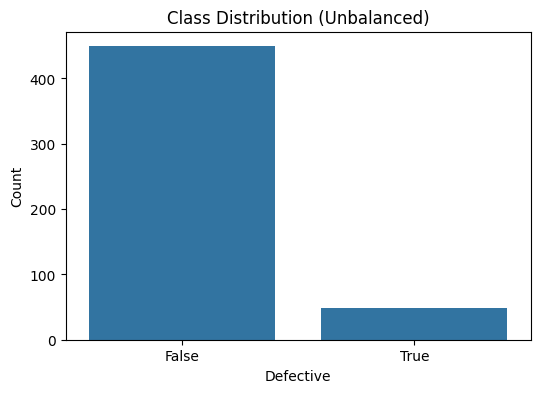

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=cm1_data, x='defects')
plt.title('Class Distribution (Unbalanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()




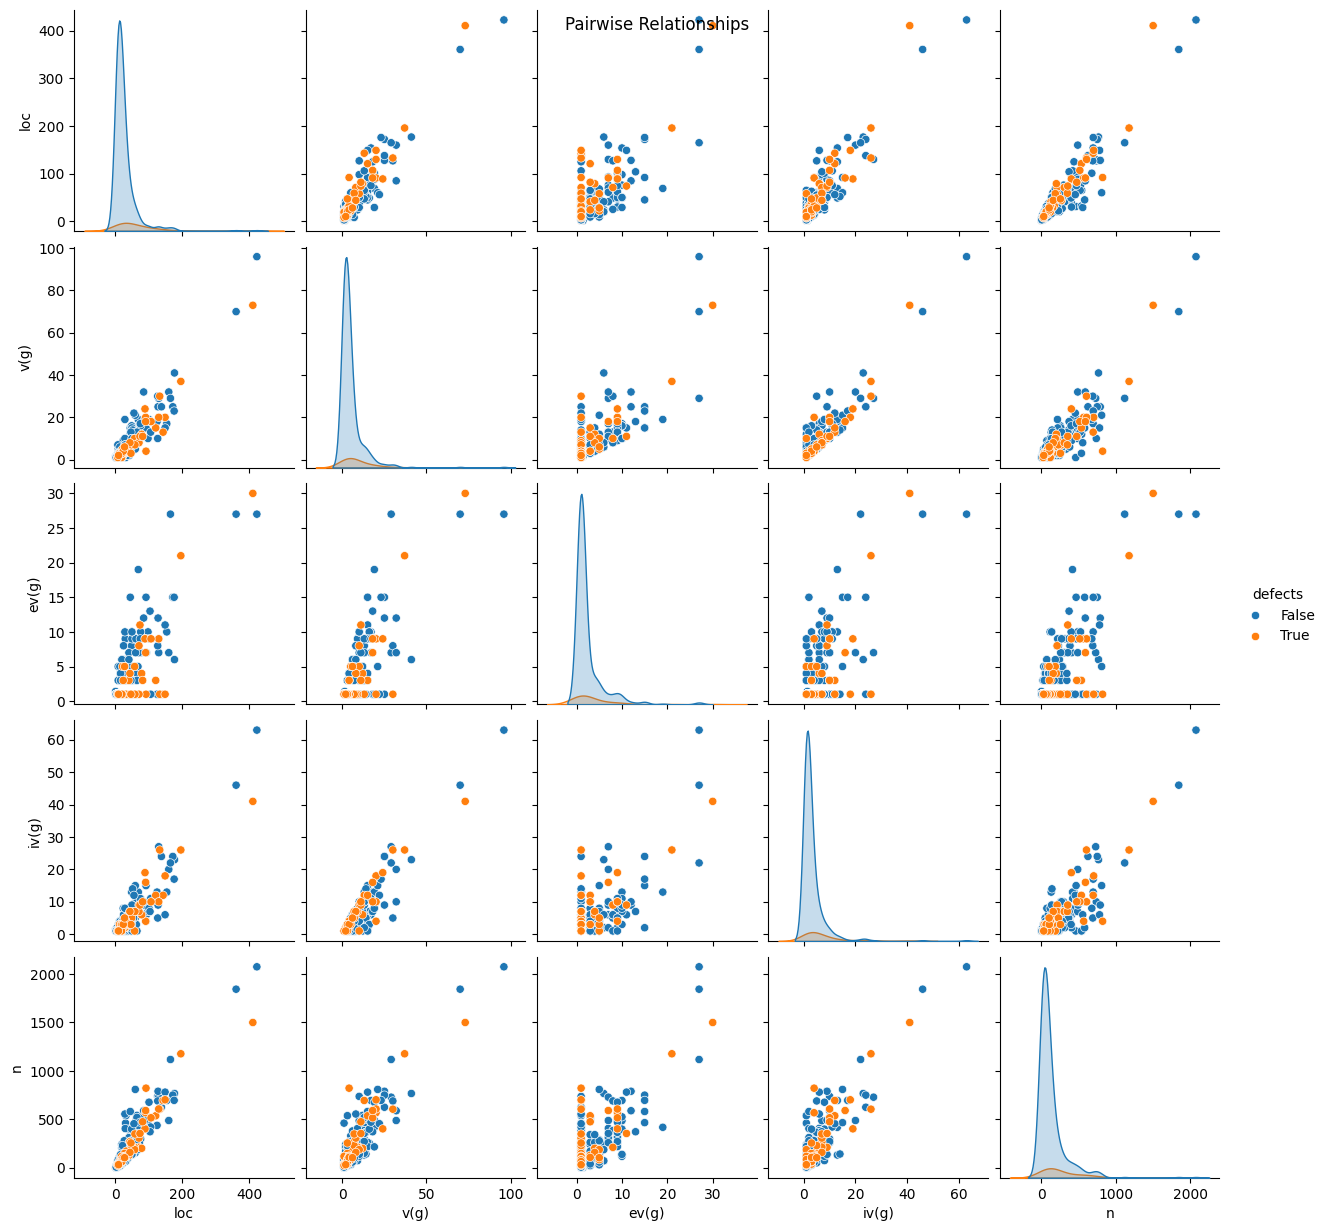

In [8]:
# Pairwise Relationships
sns.pairplot(cm1_data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'defects']], hue='defects')
plt.suptitle('Pairwise Relationships')
plt.show()



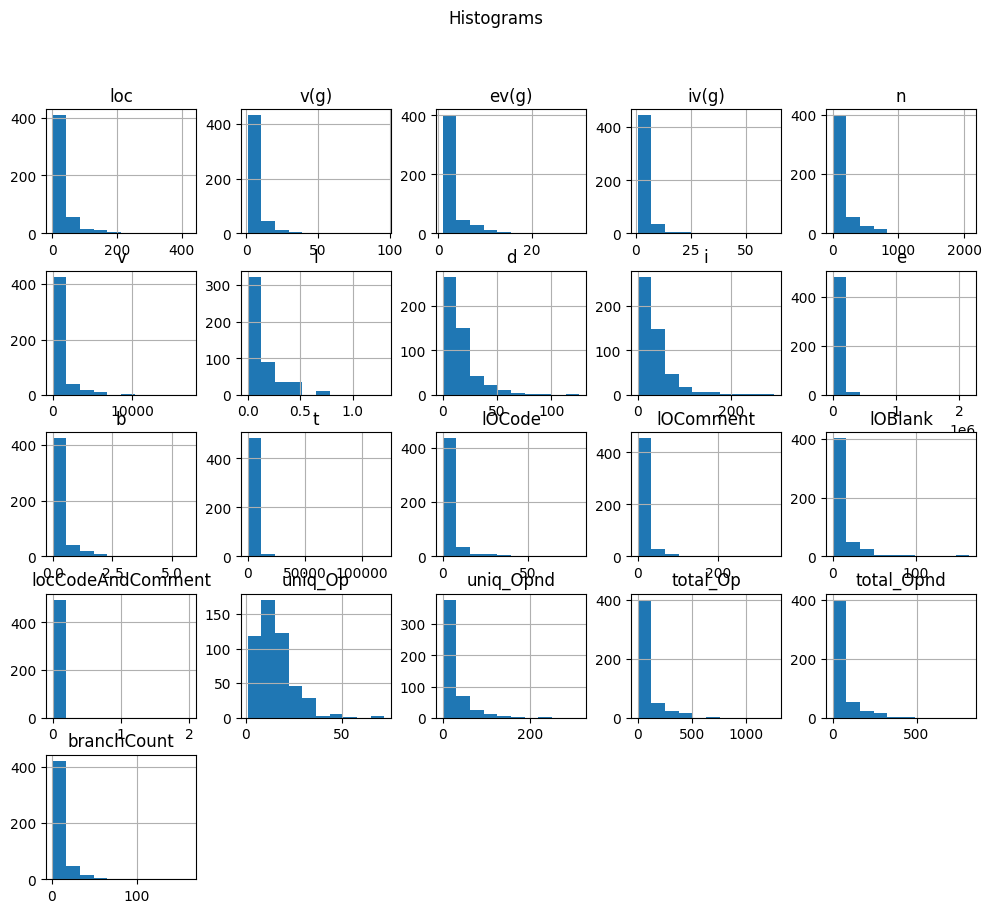

In [9]:
# Histograms
cm1_data.hist(figsize=(12, 10))
plt.suptitle('Histograms')
plt.show()


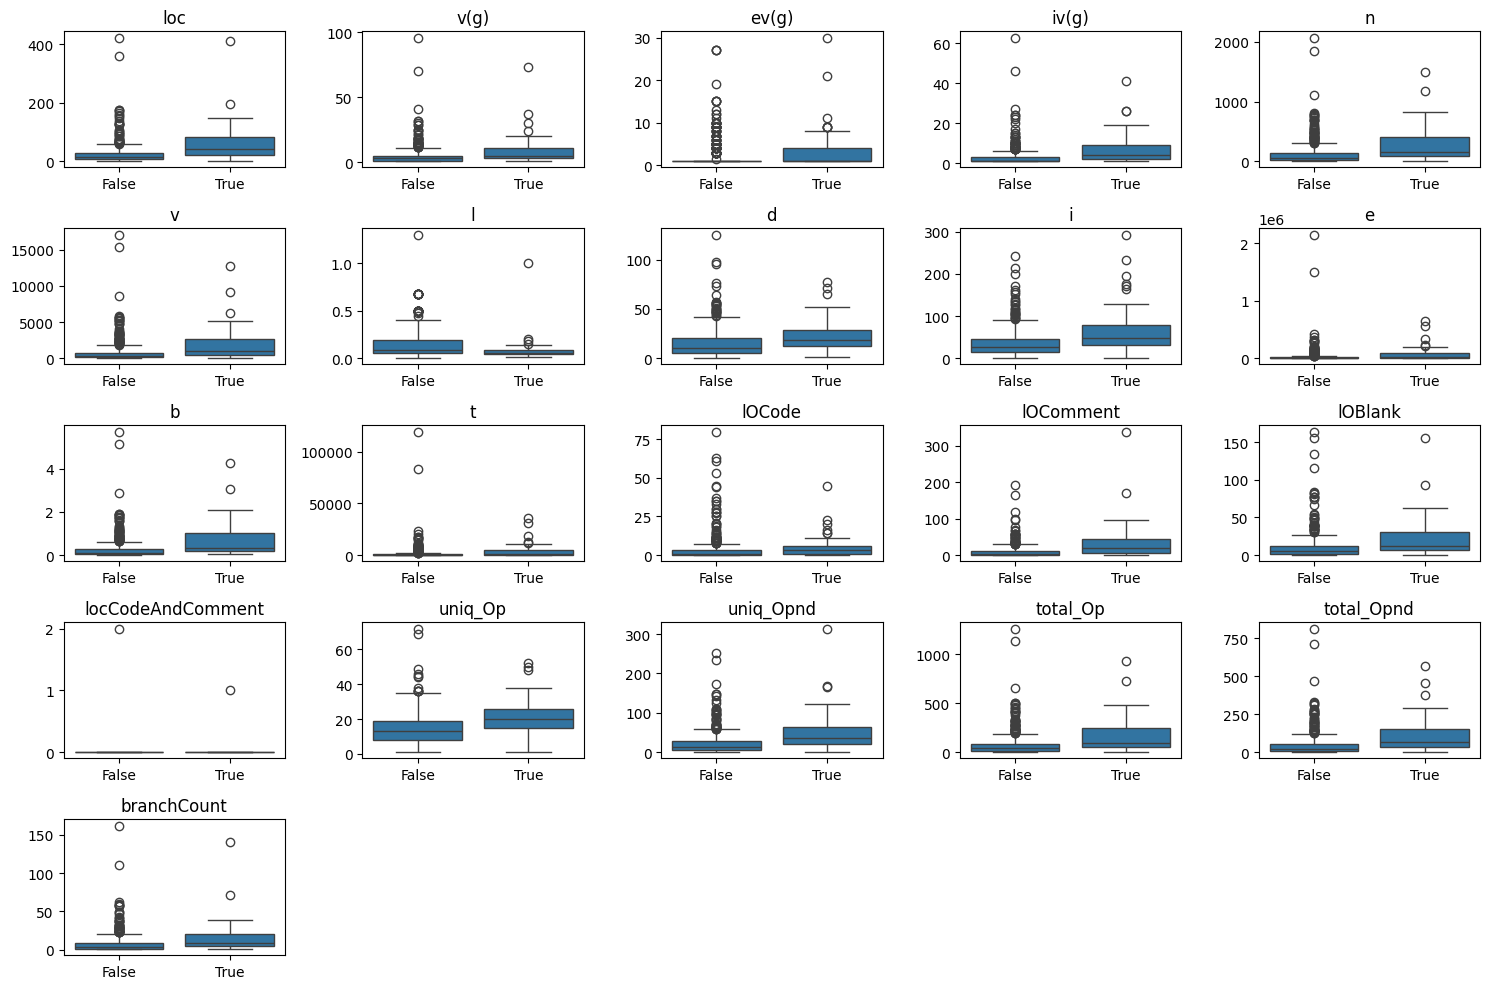

In [10]:
# Visualize box plots for all attributes
plt.figure(figsize=(15, 10))
for i, column in enumerate(cm1_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='defects', y=column, data=cm1_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **Data Balancing**

In [12]:
import pandas as pd
from imblearn.under_sampling import NearMiss


# Preprocess data
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Undersample using NearMiss
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

# Create a new DataFrame with balanced data
balanced_cm1_nm = pd.DataFrame(X_resampled, columns=X.columns)
balanced_cm1_nm['defects'] = y_resampled

# Save balanced dataset to a new CSV file
balanced_cm1_nm.to_csv("balanced_cm1.csv", index=False)


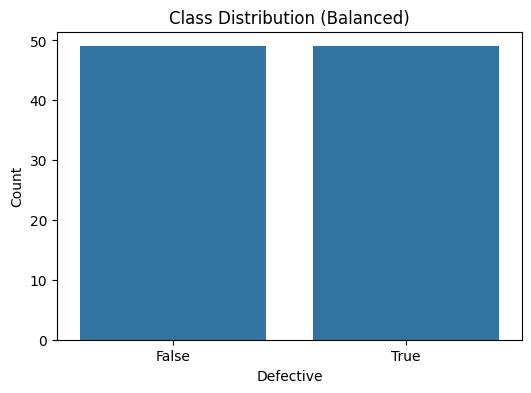

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new balanced dataset
balanced_cm1_data = pd.read_csv("balanced_cm1.csv")

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_cm1_data, x='defects')
plt.title('Class Distribution (Balanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()


# **Random Forest Classifier**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# Load the balanced dataset generated using Under_Sampling
balanced_cm1_Under_Sampling = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_Under_Sampling = balanced_cm1_Under_Sampling.drop(columns=["defects"])
y_Under_Sampling = balanced_cm1_Under_Sampling["defects"]

# Split the data into training and testing sets
X_train_Under_Sampling, X_test_Under_Sampling, y_train_Under_Sampling, y_test_Under_Sampling = train_test_split(X_Under_Sampling, y_Under_Sampling, test_size=0.2, random_state=42)

# Train RandomForestClassifier on the balanced dataset generated using Under_Sampling
rf_classifier_Under_Sampling = RandomForestClassifier(random_state=42)
rf_classifier_Under_Sampling.fit(X_train_Under_Sampling, y_train_Under_Sampling)

# Predict on the test set
y_pred_Under_Sampling = rf_classifier_Under_Sampling.predict(X_test_Under_Sampling)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Random Forest Accuracy using Under_Sampling:", accuracy_rf)

# Calculate precision
precision_rf = precision_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Random Forest Precision using Under_Sampling:", precision_rf)

# Calculate recall
recall_rf = recall_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Random Forest Recall using Under_Sampling:", recall_rf)

# Generate classification report
report_Under_Sampling = classification_report(y_test_Under_Sampling, y_pred_Under_Sampling)

# Print classification report
print("Classification Report for Random Forest using Under_Sampling:")
print(report_Under_Sampling)


Random Forest Accuracy using Under_Sampling: 0.95
Random Forest Precision using Under_Sampling: 1.0
Random Forest Recall using Under_Sampling: 0.875
Classification Report for Random Forest using Under_Sampling:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96        12
        True       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Accuracy using Under_Sampling balanced file: 0.5306122448979592
K-means Precision : 1.0
K-means Recall : 0.5306122448979592


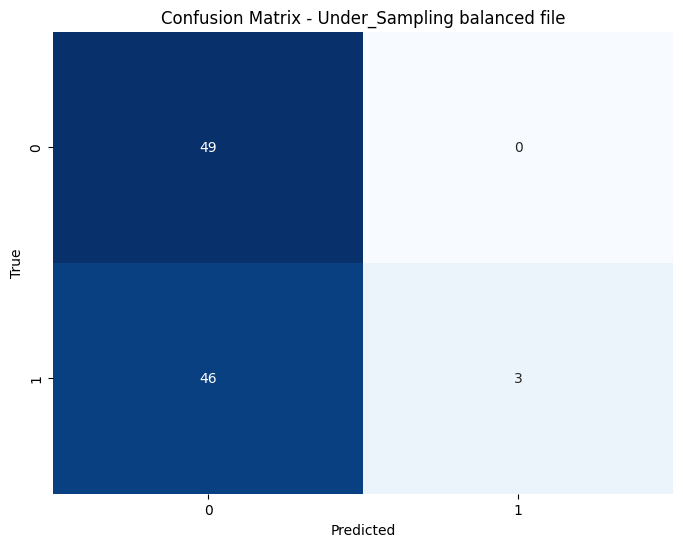

Classification Report:
              precision    recall  f1-score   support

       False       0.52      1.00      0.68        49
        True       1.00      0.06      0.12        49

    accuracy                           0.53        98
   macro avg       0.76      0.53      0.40        98
weighted avg       0.76      0.53      0.40        98



In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load Under_Sampling balanced dataset
balanced_cm1_Under_Sampling = pd.read_csv("balanced_cm1.csv")

# Separate features and target variable
X_Under_Sampling = balanced_cm1_Under_Sampling.drop(columns=["defects"])
y_Under_Sampling = balanced_cm1_Under_Sampling["defects"]

# Train KMeans model
kmeans_Under_Sampling = KMeans(n_clusters=2, random_state=42)
kmeans_Under_Sampling.fit(X_Under_Sampling)

# Predict clusters
y_pred_Under_Sampling = kmeans_Under_Sampling.labels_

# Calculate accuracy
accuracy_kmeans = accuracy_score(y_Under_Sampling, y_pred_Under_Sampling)
print("K-means Accuracy using Under_Sampling balanced file:", accuracy_kmeans)

# Calculate precision and recall
precision_kmeans = precision_score(y_Under_Sampling, y_pred_Under_Sampling)
recall_kmeans = recall_score(y_Under_Sampling, y_pred_Under_Sampling,average='weighted')

# Print precision and recall for each class
print("K-means Precision :", precision_kmeans)
print("K-means Recall :", recall_kmeans)

# Create confusion matrix
cm_Under_Sampling = confusion_matrix(y_Under_Sampling, y_pred_Under_Sampling)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Under_Sampling, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Under_Sampling balanced file")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_Under_Sampling, y_pred_Under_Sampling))


# **SVM**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Under_Sampling balanced dataset
balanced_cm1_Under_Sampling = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_Under_Sampling = balanced_cm1_Under_Sampling.drop(columns=["defects"])
y_Under_Sampling = balanced_cm1_Under_Sampling["defects"]

# Split the data into training and testing sets
X_train_Under_Sampling, X_test_Under_Sampling, y_train_Under_Sampling, y_test_Under_Sampling = train_test_split(X_Under_Sampling, y_Under_Sampling, test_size=0.2, random_state=42)

# Train SVM on the Under_Sampling balanced dataset
svm_Under_Sampling = SVC(kernel='linear')
svm_Under_Sampling.fit(X_train_Under_Sampling, y_train_Under_Sampling)

# Predict on the test set
y_pred_Under_Sampling = svm_Under_Sampling.predict(X_test_Under_Sampling)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("SVM Accuracy using Under_Sampling:", accuracy_svm)

# Calculate precision
precision_svm = precision_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("SVM Precision using Under_Sampling:", precision_svm)

# Calculate recall
recall_svm = recall_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("SVM Recall using Under_Sampling:", recall_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_Under_Sampling, y_pred_Under_Sampling))

SVM Accuracy using Under_Sampling: 0.9
SVM Precision using Under_Sampling: 0.875
SVM Recall using Under_Sampling: 0.875
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92        12
        True       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



# **Logistic Regression**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Under_Sampling balanced dataset
balanced_cm1_Under_Sampling = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_Under_Sampling = balanced_cm1_Under_Sampling.drop(columns=["defects"])
y_Under_Sampling = balanced_cm1_Under_Sampling["defects"]

# Split the data into training and testing sets
X_train_Under_Sampling, X_test_Under_Sampling, y_train_Under_Sampling, y_test_Under_Sampling = train_test_split(X_Under_Sampling, y_Under_Sampling, test_size=0.2, random_state=42)

# Train Logistic Regression on the Under_Sampling balanced dataset
lr_Under_Sampling = LogisticRegression(random_state=42)
lr_Under_Sampling.fit(X_train_Under_Sampling, y_train_Under_Sampling)

# Predict on the test set
y_pred_Under_Sampling = lr_Under_Sampling.predict(X_test_Under_Sampling)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Logistic Regression Accuracy using Under_Sampling:", accuracy_lr)

# Calculate precision
precision_lr = precision_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Logistic Regression Precision using Under_Sampling:", precision_lr)

# Calculate recall
recall_lr = recall_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Logistic Regression Recall using Under_Sampling:", recall_lr)

# Generate classification report
classification_report_Under_Sampling = classification_report(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Classification Report using Under_Sampling:")
print(classification_report_Under_Sampling)


Logistic Regression Accuracy using Under_Sampling: 1.0
Logistic Regression Precision using Under_Sampling: 1.0
Logistic Regression Recall using Under_Sampling: 1.0
Classification Report using Under_Sampling:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        12
        True       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Decision Trees**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Under_Sampling balanced dataset
balanced_cm1_Under_Sampling = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_Under_Sampling = balanced_cm1_Under_Sampling.drop(columns=["defects"])
y_Under_Sampling = balanced_cm1_Under_Sampling["defects"]

# Split the data into training and testing sets
X_train_Under_Sampling, X_test_Under_Sampling, y_train_Under_Sampling, y_test_Under_Sampling = train_test_split(X_Under_Sampling, y_Under_Sampling, test_size=0.2, random_state=42)

# Train Decision Tree on the Under_Sampling balanced dataset
dt_Under_Sampling = DecisionTreeClassifier(random_state=42)
dt_Under_Sampling.fit(X_train_Under_Sampling, y_train_Under_Sampling)

# Predict on the test set
y_pred_Under_Sampling = dt_Under_Sampling.predict(X_test_Under_Sampling)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Decision Trees Accuracy using Under_Sampling:", accuracy_dt)

# Calculate precision
precision_dt = precision_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Decision Trees Precision using Under_Sampling:", precision_dt)

# Calculate recall
recall_dt = recall_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Decision Trees Recall using Under_Sampling:", recall_dt)

# Generate classification report
report_Under_Sampling = classification_report(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Classification Report using Under_Sampling:\n", report_Under_Sampling)


Decision Trees Accuracy using Under_Sampling: 0.9
Decision Trees Precision using Under_Sampling: 0.875
Decision Trees Recall using Under_Sampling: 0.875
Classification Report using Under_Sampling:
               precision    recall  f1-score   support

       False       0.92      0.92      0.92        12
        True       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



# **Gradient Boosting**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Under_Sampling balanced dataset
balanced_cm1_Under_Sampling = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_Under_Sampling = balanced_cm1_Under_Sampling.drop(columns=["defects"])
y_Under_Sampling = balanced_cm1_Under_Sampling["defects"]

# Split the data into training and testing sets
X_train_Under_Sampling, X_test_Under_Sampling, y_train_Under_Sampling, y_test_Under_Sampling = train_test_split(X_Under_Sampling, y_Under_Sampling, test_size=0.2, random_state=42)

# Train Gradient Boosting on the Under_Sampling balanced dataset
gb_Under_Sampling = GradientBoostingClassifier(random_state=42)
gb_Under_Sampling.fit(X_train_Under_Sampling, y_train_Under_Sampling)

# Predict on the test set
y_pred_Under_Sampling = gb_Under_Sampling.predict(X_test_Under_Sampling)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_Under_Sampling, y_pred_Under_Sampling)
print("Gradient Boosting Accuracy using Under_Sampling:", accuracy_gb)

# Calculate precision and recall
precision_gb = precision_score(y_test_Under_Sampling, y_pred_Under_Sampling)
recall_gb = recall_score(y_test_Under_Sampling, y_pred_Under_Sampling)

print("Precision using Under_Sampling:", precision_gb)
print("Recall using Under_Sampling:", recall_gb)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_Under_Sampling, y_pred_Under_Sampling))


Gradient Boosting Accuracy using Under_Sampling: 0.9
Precision using Under_Sampling: 0.875
Recall using Under_Sampling: 0.875
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92        12
        True       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



# **Comparison Between models**

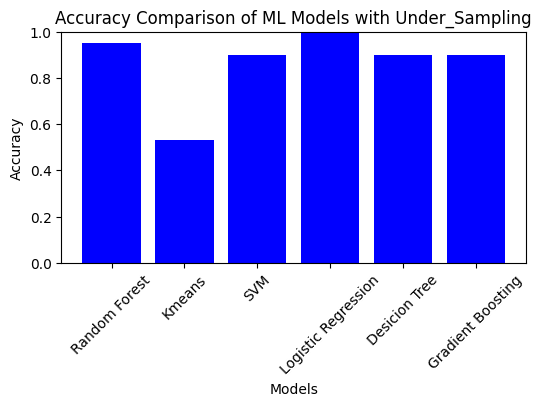

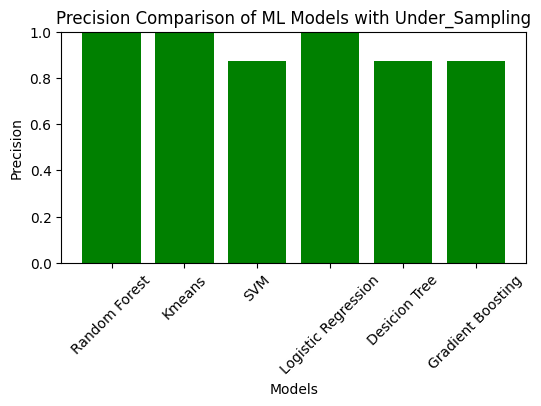

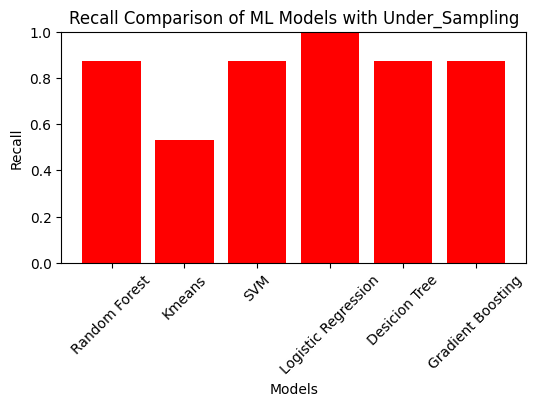

In [22]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy Comparison of ML Models with Under_Sampling')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='green')
plt.title('Precision Comparison of ML Models with Under_Sampling')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting recall
plt.figure(figsize=(6, 3))
plt.bar(models, recalls, color='red')
plt.title('Recall Comparison of ML Models with Under_Sampling')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

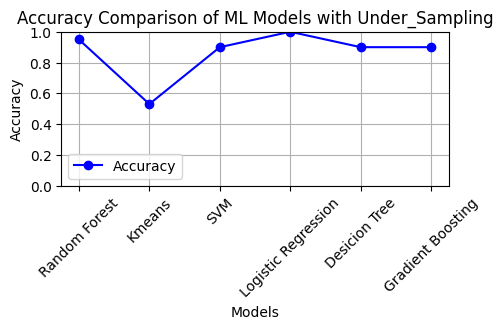

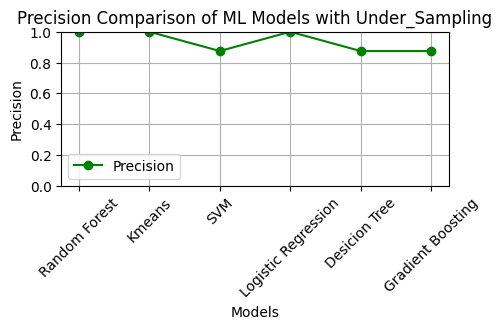

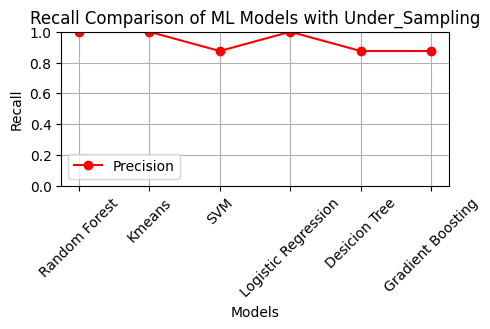

In [23]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models with Under_Sampling')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models with Under_Sampling')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting recall
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='red', label='Precision')
plt.title('Recall Comparison of ML Models with Under_Sampling')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()